In [98]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from datetime import datetime
import plotly.express as px

In [59]:
def rmse(actual, predicted):
    """
    Calculates the rmse
    Parameters: actual value and predicted values
    Returns: the rmse
    """
    mse = mean_squared_error(actual, predicted)
    rmse = (mse) ** (1/2)
    return rmse

In [62]:
df = pd.read_csv('song_data.csv')


# Removing the excess data
df = df.drop(columns=['audio_valence', 'time_signature', 'speechiness',
                      'audio_mode', 'key', 'song_duration_ms'], axis=1)

df.head(15)
    

song_name  song_popularity  acousticness  danceability  \
0   Boulevard of Broken Dreams               73      0.005520         0.496   
1                   In The End               66      0.010300         0.542   
2            Seven Nation Army               76      0.008170         0.737   
3                   By The Way               74      0.026400         0.451   
4            How You Remind Me               56      0.000954         0.447   
5             Bring Me To Life               80      0.008950         0.316   
6                  Last Resort               81      0.000504         0.581   
7     Are You Gonna Be My Girl               76      0.001480         0.613   
8               Mr. Brightside               80      0.001080         0.330   
9                  Sex on Fire               81      0.001720         0.542   
10                  The Middle               78      0.042400         0.629   
11                        Numb               63      0.004600         0.496   
12             Smooth Criminal               75      0.004340         0.647   
13                  Can't Stop               81      0.017900         0.618   
14                  Chop Suey!               69      0.000353         0.420   

    energy  instrumentalness  liveness  loudness    tempo  
0    0.682          0.000029    0.0589    -4.095  167.060  
1    0.853          0.000000    0.1080    -6.407  105.256  
2    0.463          0.447000    0.2550    -7.828  123.881  
3    0.970          0.003550    0.1020    -4.938  122.444  
4    0.766          0.000000    0.1130    -5.065  172.011  
5    0.945          0.000002    0.3960    -3.169  189.931  
6    0.887          0.001110    0.2680    -3.659   90.578  
7    0.953          0.000582    0.1520    -3.435  105.046  
8    0.936          0.000000    0.0926    -3.660  148.112  
9    0.905          0.010400    0.1360    -5.653  153.398  
10   0.897          0.000000    0.2630    -3.401  161.944  
11   0.863          0.000000    0.6390    -4.153  110.018  
12   0.964          0.003600    0.1500    -4.225  126.942  
13   0.938          0.000000    0.1670    -3.442   91.455  
14   0.929          0.000747    0.1220    -3.899  127.204

In [64]:
data = pd.read_csv("song_data.csv")
data.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

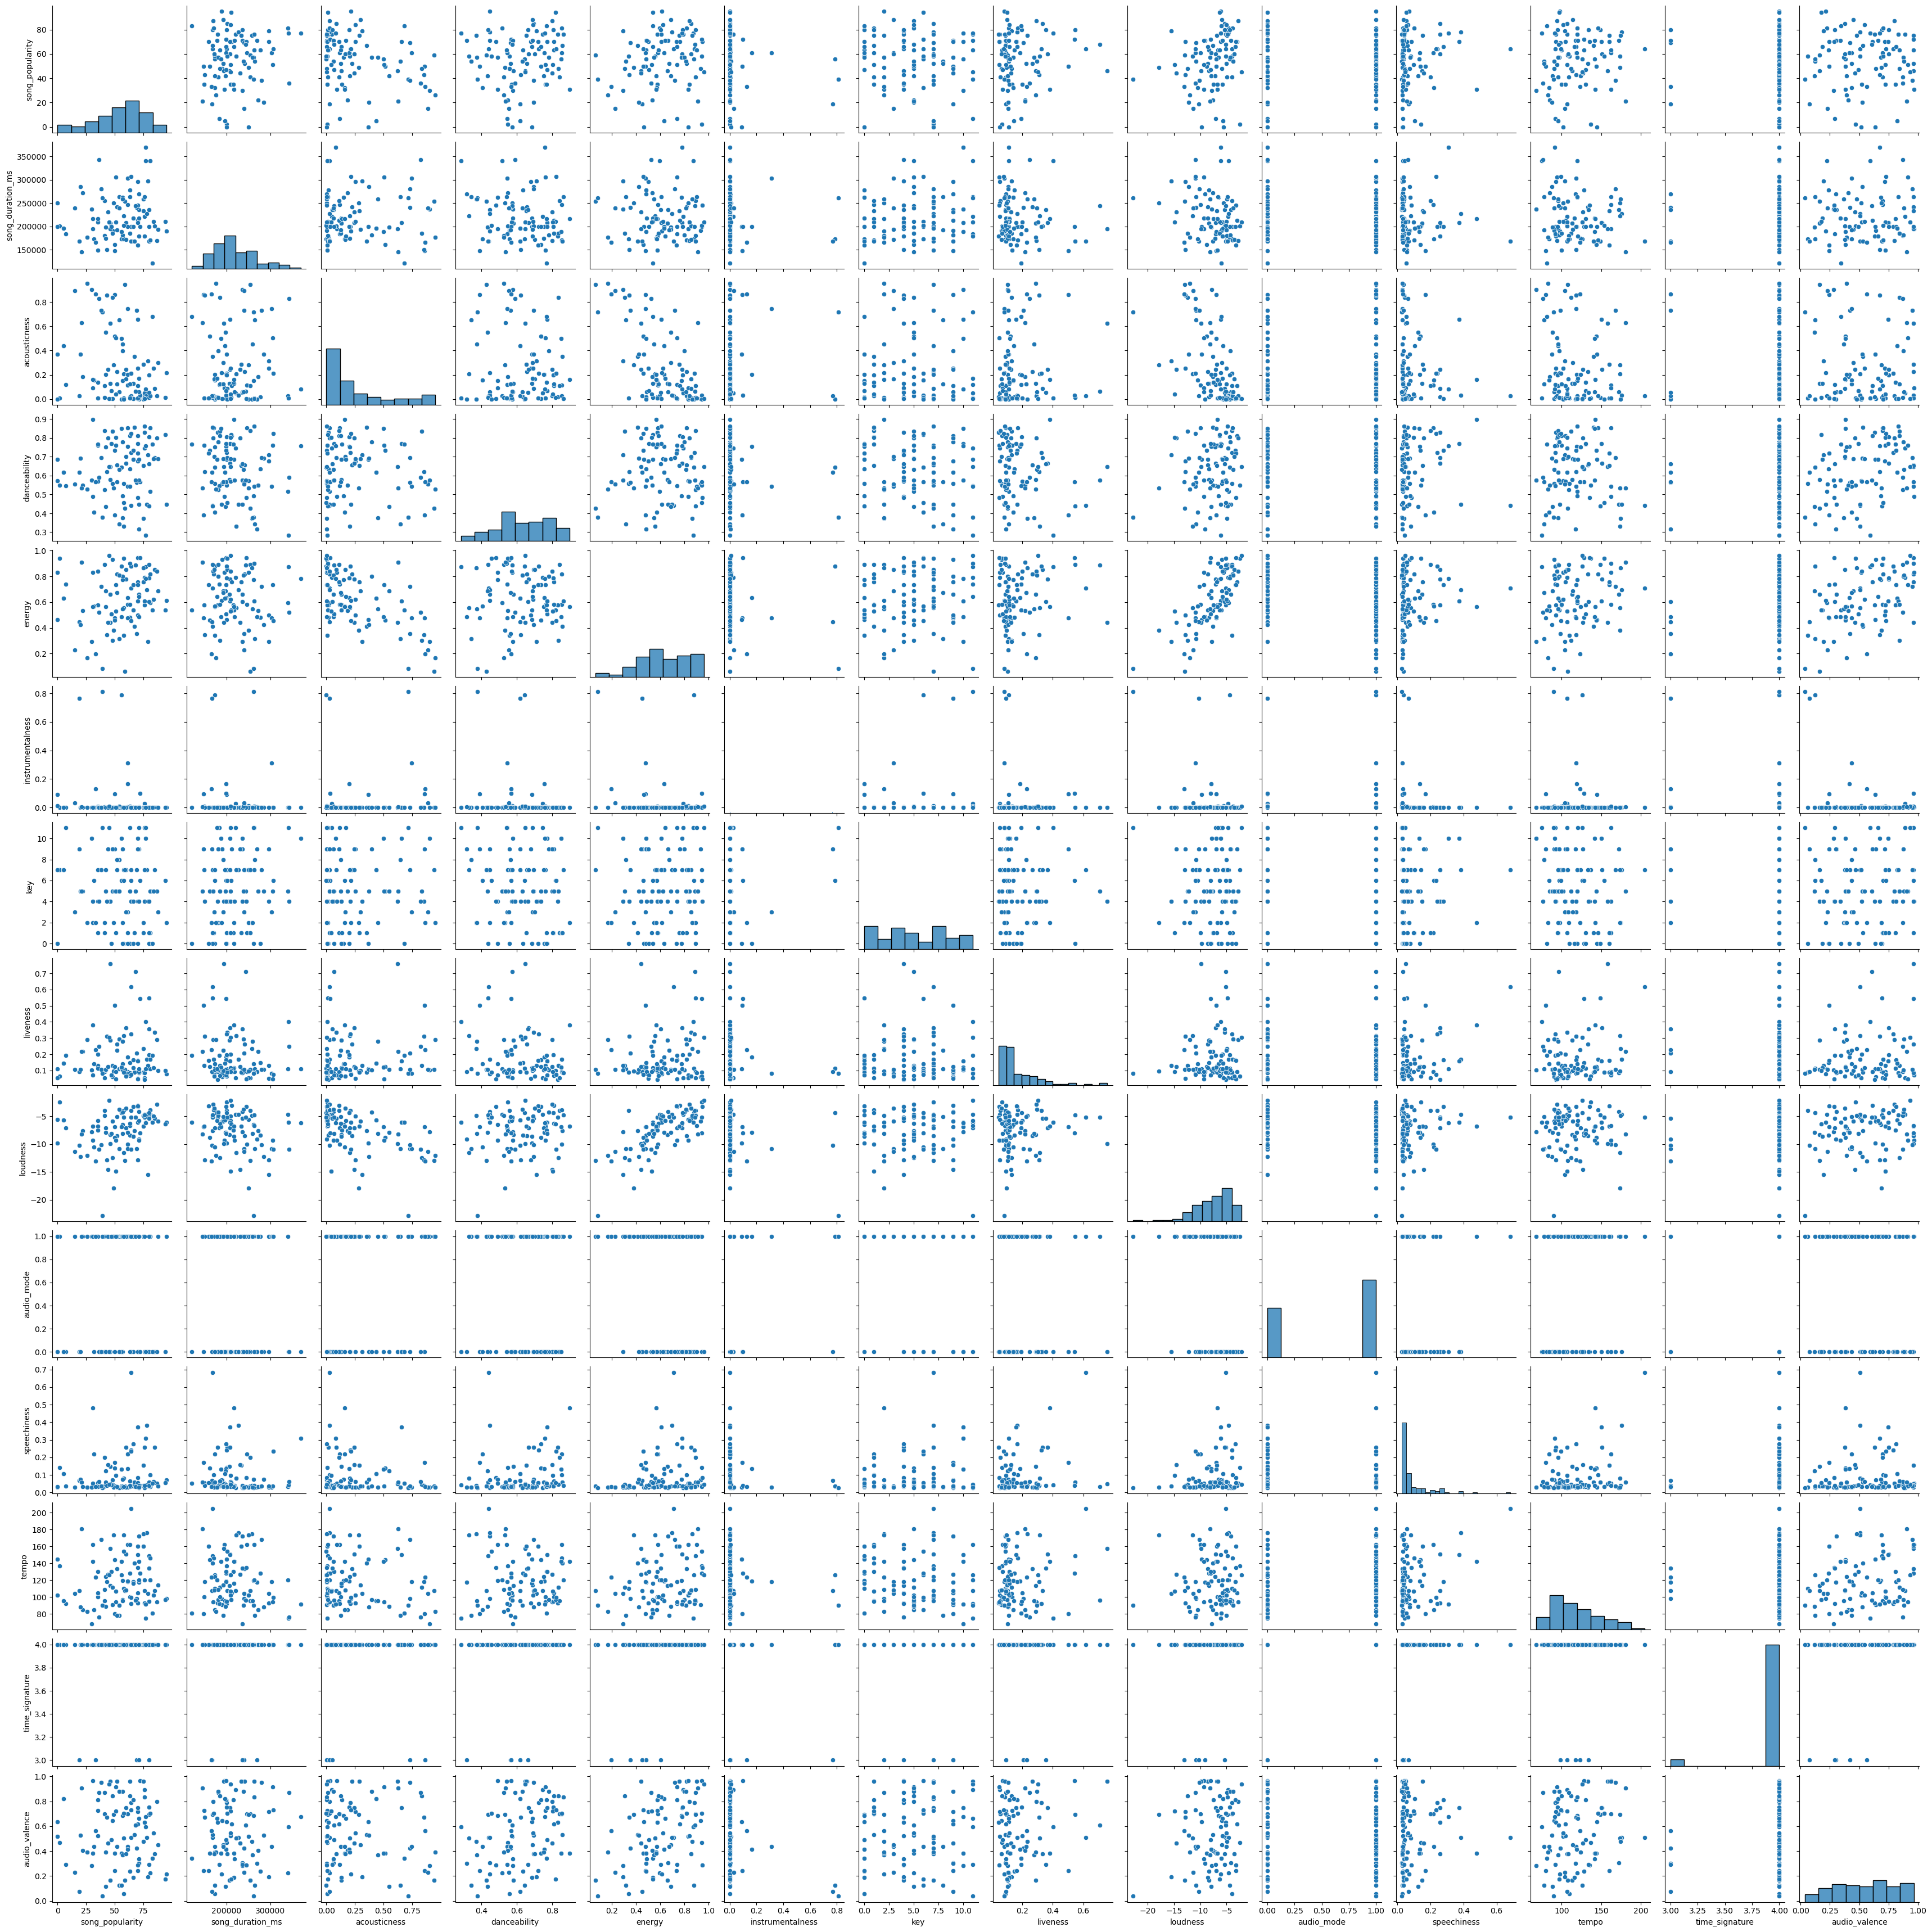

In [66]:
sample = data.sample(100)
sns.pairplot(sample)

<Axes: xlabel='song_popularity', ylabel='danceability'>

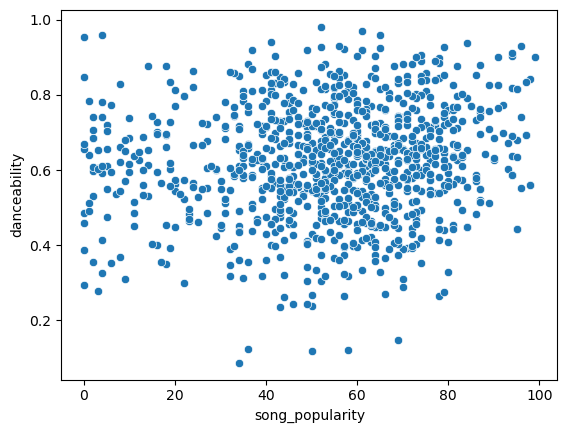

In [67]:
sample = data.sample(1000)
sns.scatterplot(data = sample, x='song_popularity', y='danceability')

<Axes: xlabel='acousticness', ylabel='energy'>

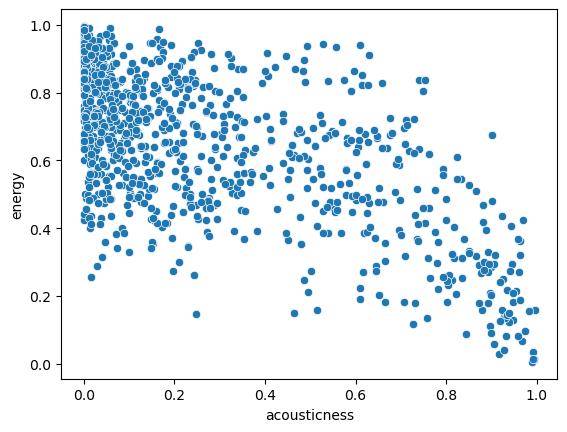

In [68]:
sns.scatterplot(data = sample, x='acousticness', y='energy')

<Axes: xlabel='energy', ylabel='loudness'>

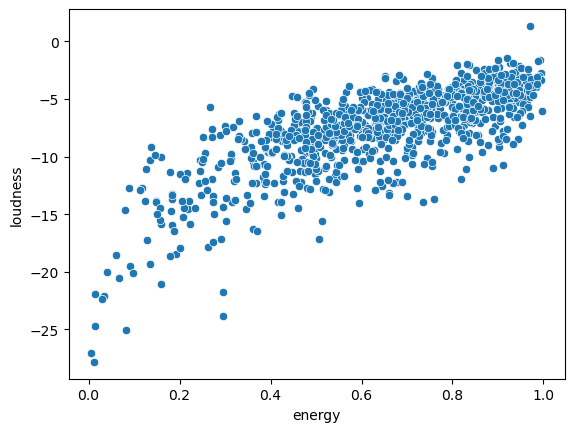

In [70]:
sns.scatterplot(data = sample, x='energy', y='loudness')

<Axes: xlabel='song_popularity', ylabel='energy'>

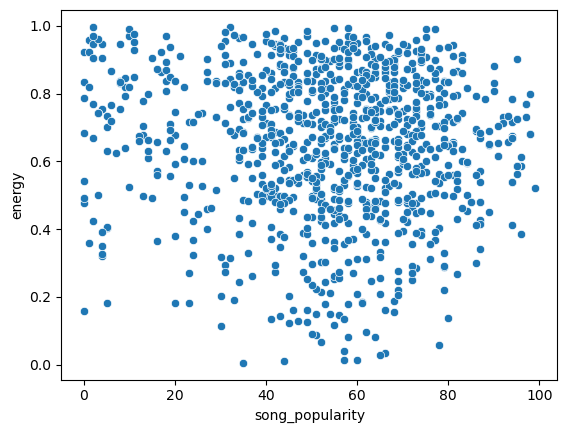

In [71]:
sns.scatterplot(data = sample, x='song_popularity', y='energy')

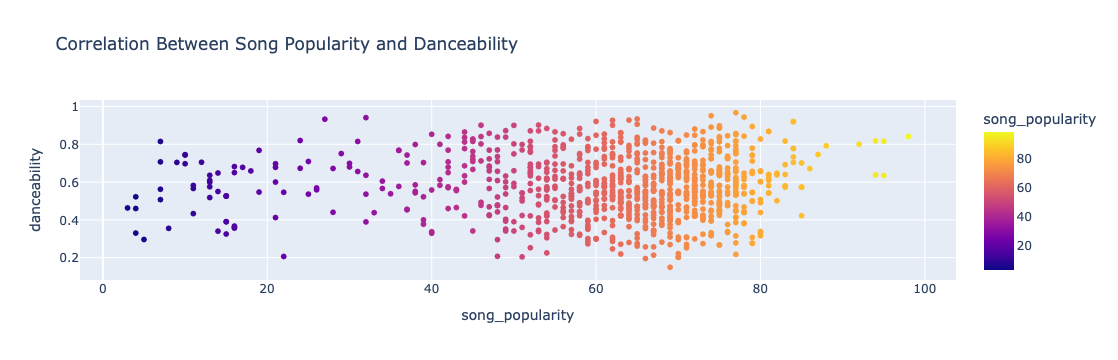

In [72]:
px.scatter(df.head(1000), x='acousticness', y='energy', color='acousticness', title = 'Correlation Between Energy and Acoustiness')

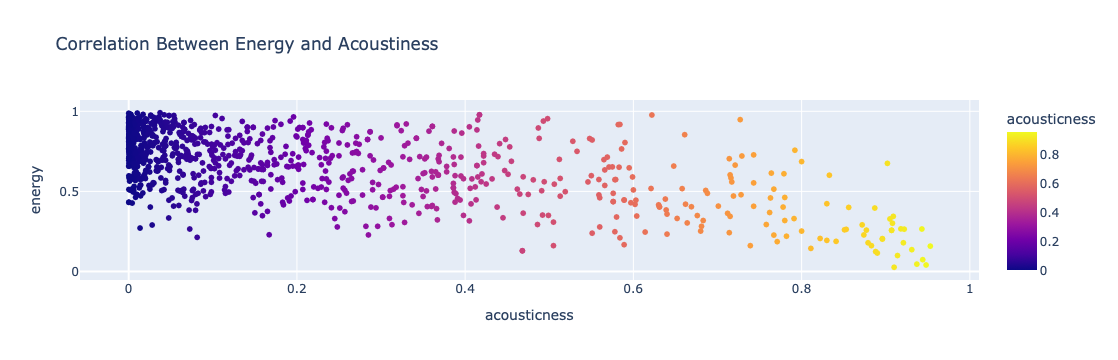

In [73]:
px.scatter(df.head(1000), x='song_popularity', y='danceability', color='song_popularity', title = 'Correlation Between Song Popularity and Danceability')

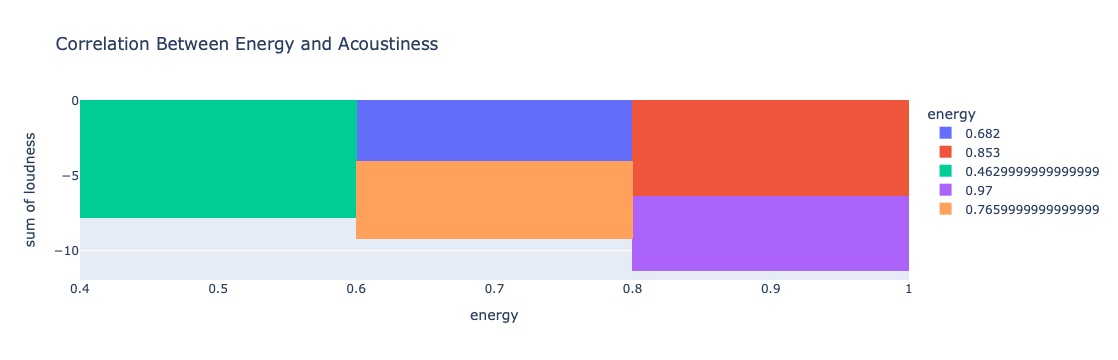

In [74]:
px.histogram(df.head(5), x='energy', y='loudness', color='energy', title = 'Correlation Between Energy and Acoustiness')

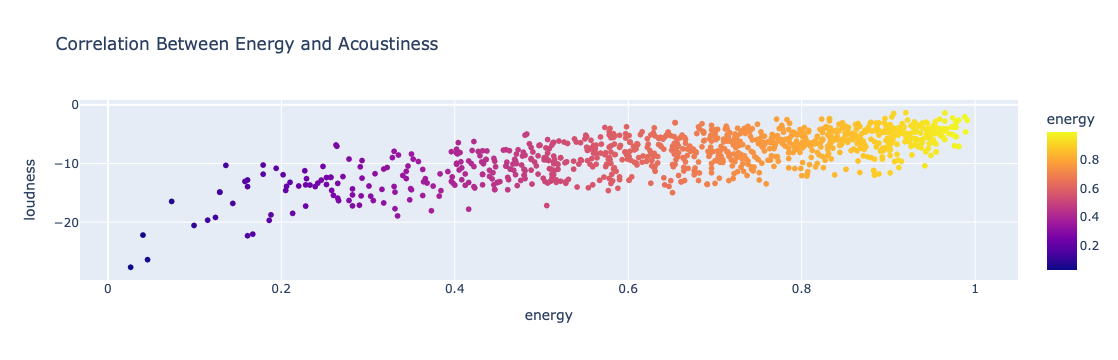

In [100]:
px.scatter(df.head(1000), x='energy', y='loudness', color='energy', title = 'Correlation Between Energy and Acoustiness')

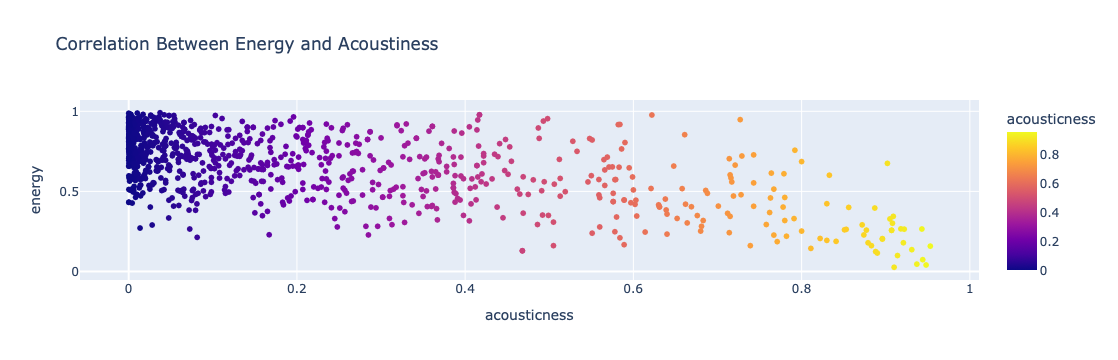

In [102]:
px.scatter(df.head(1000), x='acousticness', y='energy', color='acousticness', title = 'Correlation Between Energy and Acoustiness')

<Axes: xlabel='song_popularity', ylabel='tempo'>

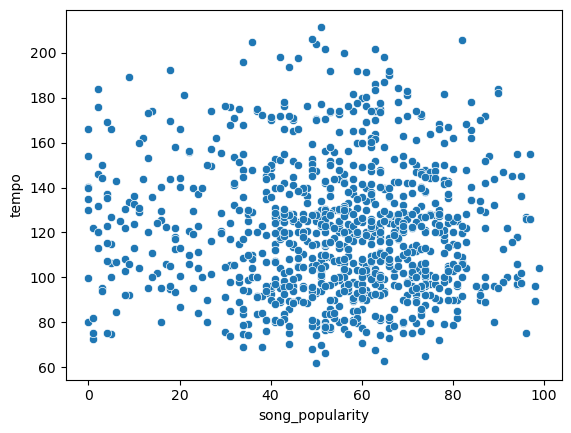

In [104]:
sns.scatterplot(data = sample, x='song_popularity', y='tempo')

<Axes: xlabel='song_popularity', ylabel='instrumentalness'>

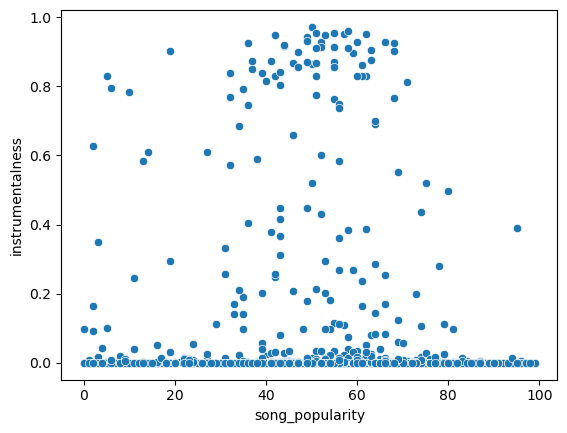

In [77]:
sns.scatterplot(data = sample, x='song_popularity', y='instrumentalness')

In [78]:
features = ["energy", "loudness", "acousticness", "instrumentalness", "liveness", "tempo"]
X_train, X_test, y_train, y_test = train_test_split(data[features], data["song_popularity"], 
                                                    random_state = 0)
X_train.head()

energy  loudness  acousticness  instrumentalness  liveness    tempo
14422   0.808    -5.550       0.07110          0.000003    0.0816   95.000
8704    0.584    -7.411       0.00127          0.000000    0.0773  159.899
12743   0.648    -9.185       0.02880          0.000000    0.0904  131.925
4769    0.289    -8.131       0.64500          0.000000    0.1480  104.851
10754   0.467   -10.303       0.13000          0.959000    0.1130   85.996

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [80]:
predictions = model.predict(X_test)
results = pd.DataFrame()
results["Actual"] = y_test
results["Predictions"] = predictions
results.head(10)

Actual  Predictions
15029      37    53.000914
14172      87    56.643475
5551       43    58.424590
13488      22    53.495739
5988       41    52.548150
5274       23    49.348573
15677      46    50.074207
7411       47    59.444883
1870       78    59.203425
16276      65    49.836886

In [81]:
rmse1 = rmse(results["Actual"], results["Predictions"])
rmse1

21.680183974608184